##MetAtlas Workflow Tool
1. Acquire great data and upload it to this folder: /project/projectdirs/metatlas/data_for_metatlas_2/
2. Create an experiment. This requires that you specify a directory with your mzML files in it.  Convert the files and register them in the experiment.
3. Create a file specification sheet for your experiment and fill it in. Populate the sheet and apply the file specification to the experiment.
4. Create an Atlas in a spreadsheet. Import the spreadsheet as an Atlas in the experiment

In [2]:
%matplotlib notebook
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pylab as plt
import sys
import glob, os

# import glob
# metob.load_lcms_files(glob.glob('/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates/*.*’))


curr_ld_lib_path = ''
os.environ['LD_LIBRARY_PATH'] = curr_ld_lib_path + ':/project/projectdirs/openmsi/jupyterhub_libs/boost_1_55_0/lib' + ':/project/projectdirs/openmsi/jupyterhub_libs/lib'
import sys
# sys.path.remove('/anaconda/lib/python2.7/site-packages')
sys.path.append('/global/project/projectdirs/openmsi/jupyterhub_libs/anaconda/lib/python2.7/site-packages')

sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

from metatlas import metatlas_objects as metob
from metatlas import h5_query as h5q
from metatlas import mzml_to_hdf



In [3]:
# import glob
# metob.load_lcms_files(glob.glob('/project/projectdirs/metatlas/raw_data/kblouie/TagOP_Trial_1_DP_NHSCA_NHSPU/*.*'))

In [4]:
myRun = metob.queryDatabase('lcmsrun',name='20150915_Ag50mm_MeOH_NEG_MSMS_1_Super_EColi_DP%')[0]
print myRun

20150915_Ag50mm_MeOH_NEG_MSMS_1_Super_EColi_DP (988fe0c185aa435fa5e18e62e2e52139)


<IPython.core.display.Javascript object>


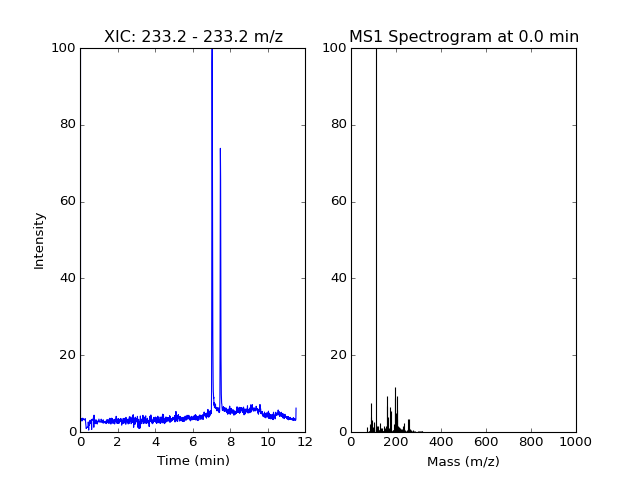

In [5]:
# myRun = metob.LcmsRun(hdf5_file = '/global/homes/b/bpb/ExoMetabolomic_Example_Data/MEDIA-1.h5')
myRun.interact(min_mz = 233.153, max_mz = 233.155)#, polarity = 'positive', ms_level=1)

In [25]:
import tables
target_mz = 233.15416
target_mz_tolerance = 105
target_rt_min = 7.1
target_rt_max = 7.15
# target_rt_min = 7.4
# target_rt_min = 7.6
fid = tables.open_file(myRun.hdf5_file)
data = h5q.get_data(fid,2,0,
                                 min_precursor_mz = target_mz - target_mz * target_mz_tolerance / 1e6,
                                 max_precursor_mz = target_mz + target_mz * target_mz_tolerance / 1e6,
#                                  max_mz = mz_ref.mz + mz_ref.mz*mz_ref.mz_tolerance/1e6,
                                 min_rt = target_rt_min,
                                 max_rt = target_rt_max,
                                 )

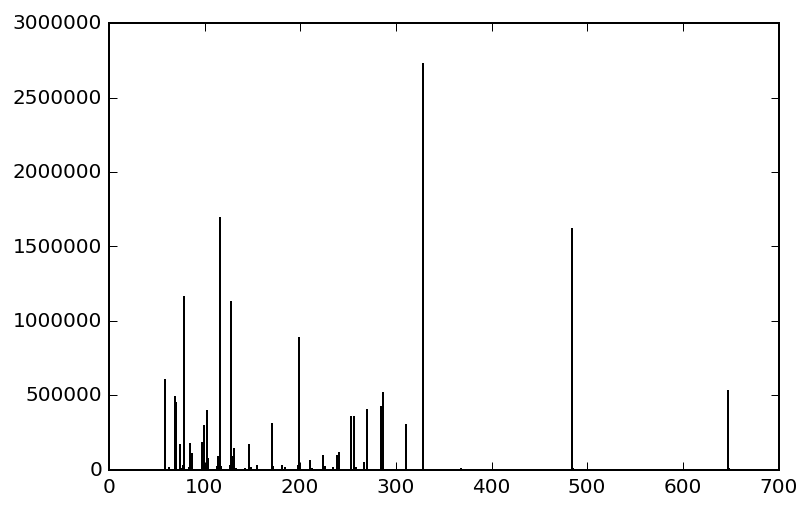

In [39]:
%matplotlib inline
import numpy as np
plt.vlines(data['mz'],np.zeros(data['i'].shape),data['i'])
plt.show()

In [55]:
sys.path.insert(0,'/project/projectdirs/openmsi/projects/meta-iq/pactolus/pactolus' )

%system ls /project/projectdirs/openmsi/projects/meta-iq/pactolus/pactolus/
from generate_frag_dag import *

ImportError: No module named rdkit

In [31]:
allruns = metob.queryDatabase('lcmsrun',created_by='kblou%')

KeyboardInterrupt: 

In [8]:
print len(allruns)

378


In [10]:
myCompound = metob.Compound()
myCompound.edit()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [14]:
myCompound.store()

In [15]:
allCompounds = metob.queryDatabase('Compounds')
print allCompounds

[{'InChl': u'InChI=1S/C8H11NO3/c1-5-8(12)7(4-11)6(3-10)2-9-5/h2,10-12H,3-4H2,1H3',
 'created': '2015-09-18T18:54:08',
 'created_by': u'bpb',
 'description': u'The 4-methanol form of VITAMIN B 6 which is converted to PYRIDOXAL PHOSPHATE which is a coenzyme for synthesis of amino acids, neurotransmitters (serotonin, norepinephrine), sphingolipids, aminolevulinic acid. Although pyridoxine and Vitamin B 6 are still frequently used as synonyms, especially by medical researchers, this practice is erroneous and sometimes misleading (EE Snell; Ann NY Acad Sci, vol 585 pg 1, 1990).',
 'functional_sets': [],
 'last_modified': '2015-09-18T19:01:03',
 'modified_by': u'bpb',
 'name': u'Pyridoxine',
 'prev_unique_id': u'2e1cd5736970490e8712be1e9dcac14b',
 'reference_xrefs': [],
 'unique_id': u'acd2c36fbd344088bb927b55961f441a'}]


In [ ]:
myMethod = metob.Method()
myMethod.edit()

In [58]:
# queryDatabase('Atlas',user='curt',description='an atlas')
# queryDatabase('group',modified_by='silvest',name='My cool title')

In [24]:

# myGrade = metob.IdentificationGrade(name='A', description='High intensity and verifiable by MSMS and RT authentic standard')
# myGrade.store()
# myGrade = metob.IdentificationGrade(name='B', description='Verifiable by MSMS from database or publication')
# myGrade.store()
# myGrade = metob.IdentificationGrade(name='C', description='Has fragment ion or neutral loss characteristic of a class of compounds')
# myGrade.store()
# myGrade = metob.IdentificationGrade(name='D', description='Unambiguous chemical formula and adduct')
# myGrade.store()
# myGrade = metob.IdentificationGrade(name='E', description='Significant feature with MSMS suggestion from MIDAS')
# myGrade.store()
# myGrade = metob.IdentificationGrade(name='F', description='Unknown feature that is not significant')
# myGrade.store()


In [28]:
myIDGrade = metob.queryDatabase('IdentificationGrade',name='A')
myIDGrade

[{'created': '2015-09-18T22:40:44',
  'created_by': u'bpb',
  'description': u'High intensity and verifiable by MSMS and RT authentic standard',
  'last_modified': '2015-09-18T22:40:44',
  'modified_by': u'bpb',
  'name': u'A',
  'prev_unique_id': u'',
  'unique_id': u'1f1e6edd1bf84aad96365345e9f6ece3'}]

In [26]:
atlases = metob.queryDatabase('Atlas',created_by='bpb')
for a in atlases:
    print a
myAtlas = atlases[3]
# print myAtlas
myAtlas

Demo Atlas (4aa04a7587f34061a48d2d6fa75d9c85)
Untitled (6628e404509f4b1093bf0d66cae852ed)
R2A Media Positive Mode Hilic (3270d704c3774a269650e7bd2926e611)
R2A Media Positive Mode Hilic (1105d024f3834efa96c88dbee11fe873)


{'compound_ids': [],
 'created': '2015-09-18T19:25:55',
 'created_by': u'bpb',
 'description': u'No description',
 'last_modified': '2015-09-19T00:24:17',
 'modified_by': u'bpb',
 'name': u'R2A Media Positive Mode Hilic',
 'prev_unique_id': u'24e3b62f79514ece984edcaa4109bb2e',
 'unique_id': u'1105d024f3834efa96c88dbee11fe873'}

In [ ]:
# class FragmentationReference(Reference):

#     polarity = Enum(POLARITY, 'positive')
#     precursor_mz = CFloat()
#     mz_intensities = List(Instance(MzIntensityPair),
#                           help='list of [mz, intesity] tuples that describe ' +
#                                ' a fragmentation spectra')

# class MzIntensityPair(MetatlasObject):
#     mz = CFloat()
#     intensity = CFloat()

# @set_docstring
# class MzReference(Reference):
#     """Source of the assertion that a compound has a given m/z and
#     other properties directly tied to m/z.
#     """ 
#     mz = CFloat()
#     mz_tolerance = CFloat()
#     mz_tolerance_units = Enum(('ppm', 'Da'), 'ppm')
#     detected_polarity = Enum(POLARITY, 'positive')
#     adduct = CUnicode(help='Optional adduct')
#     modification = CUnicode(help='Optional modification')
#     observed_formula = CUnicode(help='Optional observed formula')

In [29]:
my_ref = []
my_ref.append(metob.RtReference(lcms_run=myRun, RTpeak=2.6, RTmin = 2.0, RTmax = 3.0, RTUnits = 'min'))
my_ref.append(metob.MzReference(lcms_run=myRun, mz=170.081169, mz_tolerance=5, mz_tolerance_units='ppm', detected_polarity='positive',adduct='+Proton',modification='',observed_formula='C8H11NO3') ) #TODO: should be neutral formula
# metob.FragmentationReference() #TODO: should be the reference to a real spectrum in a file

# my_ref.append(metob.FragmentationReference(lcms_run=myRun, RTpeak=2.6, RTmin = 2.0, RTmax = 3.0, RTUnits = 'min'))
my_id = metob.CompoundId(compound=myCompound, identification_grade=myIDGrade[0], references=my_ref)
# myAtlas = metob.Atlas(name = 'R2A Media Positive Mode Hilic', compounds_ids = [my_id])
myAtlas.compound_ids = [my_id] #TODO: should be compound_identifications
myAtlas.store()


NameError: name 'myCompound' is not defined

In [21]:
print myAtlas.compounds_ids[0].compound.name
print myAtlas.compounds_ids[0].compound.InChl #TODO: Change to InChI
# print myAtlas.compounds_ids[0].identification_grade
rt_ref = myAtlas.compounds_ids[0].references[0]
mz_ref = myAtlas.compounds_ids[0].references[1]
print rt_ref.RTpeak, rt_ref.RTmin, rt_ref.RTmax
print mz_ref.mz, mz_ref.mz_tolerance, mz_ref.mz_tolerance_units

IndexError: list index out of range

In [13]:

#TODO: I need to specify a method for these files
import glob, os
myPath = '/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates'
myFiles = glob.glob(os.path.join(myPath,'*.h5'))
# print myFiles
myItems = []
for f in myFiles:
    if 'HB42' in f:
        myItems.append( metob.LcmsRun(hdf5_file = f) )
spentmediaFiles = metob.Group(name='HB42 Spent Medium',description='Spent medium from isolate HB42 grown in R2A and analyzed with hilic positive mode',items=myItems)
spentmediaFiles.store()

myItems = []
for f in myFiles:
    if 'R2A' in f:
        myItems.append( metob.LcmsRun(hdf5_file = f))
mediaFiles = metob.Group(name='Control Medium',description='R2A medium analyzed with hilic positive mode',items=myItems)
mediaFiles.store()

myExperiment = metob.Group(name='Control vs Spent Medium',
                           description='Four replicates of both R2A medium and spent medium from isolate HB42 analyzed with hilic positive mode',
                           items=[spentmediaFiles,mediaFiles])
myExperiment.store()



In [14]:
print myExperiment.description
print myExperiment.items[0].description
print myExperiment.items[0].items[0].hdf5_file
print myExperiment.items[1].description
print myExperiment.items[1].items[0].hdf5_file


Four replicates of both R2A medium and spent medium from isolate HB42 analyzed with hilic positive mode
Spent medium from isolate HB42 grown in R2A and analyzed with hilic positive mode
/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates/20150424_pHILIC_POS_MSMS_HB42-4.h5
R2A medium analyzed with hilic positive mode
/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates/20150424_pHILIC_POS_MSMS_R2A-4.h5


In [126]:
from metatlas import h5_query as h5q

In [15]:
# TODO: reconvert files and use LcmsRun.interact
# This was done the old way and won't work anymore
data = []
for f in myExperiment.items:
    for ff in f.items:
        print ff.hdf5_file
        data.append(h5q.get_data(ff.hdf5_file,
                                 1,
                                 1,
                                 min_mz = mz_ref.mz - mz_ref.mz*mz_ref.mz_tolerance/1e6,
                                 max_mz = mz_ref.mz + mz_ref.mz*mz_ref.mz_tolerance/1e6,
                                 min_rt = rt_ref.RTmin,
                                 max_rt = rt_ref.RTmax,
                                 ))

/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates/20150424_pHILIC_POS_MSMS_HB42-4.h5


NameError: name 'mz_ref' is not defined

In [123]:
# import pandas as pd
# atlas_file = '/global/homes/b/bpb/20150804_POS_pHILIC_R2A_Small.txt'
# finfo_file = '/global/homes/b/bpb/POS_C18_Actino_FileInfo.txt'

# df = pd.read_csv(atlas_file,sep='\t')
# df.fillna('',inplace=True)
# comp_list = df.to_dict('records')

# df = pd.read_csv(finfo_file,sep='\t')
# df.fillna('',inplace=True)
# finfo_list = df.to_dict('records')

# print comp_list[0]
# # print finfo_list

In [4]:
# compounds = []
# for comp in comp_list:
#     compounds.append(metatlas_objects.Compound(name = comp['name'], 
#                                formula = comp['formula'], 
#                                adducts = comp['adducts'], 
#                                mz = comp['mz'], 
#                                mz_threshold = comp['mz_threshold'],
#                                rt_min = comp['rt_min'], 
#                                rt_max = comp['rt_max'], 
#                                rt_peak = comp['rt_peak'],
#                                neutral_mass = comp['neutral_mass'],
#                                pubchem_id = comp['pubchem_id']))